In [1]:
import tweepy
import pandas as pd
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to C:\Users\SweetY
[nltk_data]     pAtel\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
api_key = "0Nfp0QdlOHXy5FVWtI8T7xdct"
api_secret = "7IMXzjvfbStJejs1iI2B75esFcGehySRvWil31ZKGl48yNfr9E"
access_token = "1354846100847550467-Lelq383ZqoVZDlRTyj9BfmVkWNyWyU"
access_secret = "vqAMs6mi3oQpkwboh554koYc1e3ScEXbBdyGRqRV2E1Q5"

In [3]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [4]:
user_ids = ['JustinTrudeau', 'Huawei', 'BarackObama', 'taylorswift13']
no_of_tweets = 200
tweets = []
likes = []
time = []

In [5]:
for user_id in user_ids:
    for i in tweepy.Cursor(api.user_timeline, id=user_id, tweet_mode="extended").items(no_of_tweets):
        tweets.append(i.full_text)
        likes.append(i.favorite_count)    
        time.append(i.created_at)

In [ ]:
# cursor = tweepy.Cursor(api.user_timeline, id='JustinTrudeau', tweet_mode="extended").items(1)

for i in tweepy.Cursor(api.user_timeline, id='JustinTrudeau', tweet_mode="extended").items(no_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)    
    time.append(i.created_at)

In [6]:
tweets_df = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time})

In [7]:
tweets_df

tweets   likes  \
0    The right to choose is a woman’s right and a w...   22790   
1    Le droit des femmes de choisir appartient à el...     671   
2    A new national record and another medal for @K...    1797   
3    Un nouveau record canadien et une autre médail...     300   
4    More money for things like food, clothes, and ...     837   
..                                                 ...     ...   
795      Love her!! \n👏💕💐🥇🙏💕💐👏 https://t.co/fq8crQpbsh  161670   
796  Can’t wait to watch @Disclosure_Doc on @netfli...   75304   
797  For my family, everything that has transpired ...   86020   
798  Personally, I’ve made the decision to give all...   88251   
799  Happy Juneteenth! I want to thank @TheRoot and...  110903   

                   time  
0   2021-07-31 14:14:40  
1   2021-07-31 14:14:27  
2   2021-07-31 02:21:29  
3   2021-07-31 02:20:49  
4   2021-07-30 21:05:19  
..                  ...  
795 2020-07-10 18:24:36  
796 2020-06-19 17:09:36  
797 2020-06-19 04:01:22  
798 2020-06-19 04:01:22  
799 2020-06-19 04:01:21  

[800 rows x 3 columns]

In [8]:
tweets_df.to_csv('tweets_collected_updated') #specify location

In [12]:
def cleaner(tweet):
    # Remove @ sign
    tweet = re.sub("@[A-Za-z0-9]+","",tweet)
    
    # Remove http links
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    
    # Remove puncutations
    tweet = re.sub('[()!?]', " ", tweet)
    tweet = re.sub('\[.*?\]',"  ", tweet)
    
    # Join the sub strings generated from re.sub
    tweet = " ".join(tweet.split())
    
    # Remove Emojis
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI)
    
    # Remove hashtag sign and keep the text
    tweet = tweet.replace("#", "").replace("_", " ") 
    
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    
    return tweet

In [13]:
tweets_df['cleaned_tweets'] = tweets_df['tweets'].map(lambda x: cleaner(x))


In [14]:
tweets_df

tweets   likes  \
0    The right to choose is a woman’s right and a w...   22790   
1    Le droit des femmes de choisir appartient à el...     671   
2    A new national record and another medal for @K...    1797   
3    Un nouveau record canadien et une autre médail...     300   
4    More money for things like food, clothes, and ...     837   
..                                                 ...     ...   
795      Love her!! \n👏💕💐🥇🙏💕💐👏 https://t.co/fq8crQpbsh  161670   
796  Can’t wait to watch @Disclosure_Doc on @netfli...   75304   
797  For my family, everything that has transpired ...   86020   
798  Personally, I’ve made the decision to give all...   88251   
799  Happy Juneteenth! I want to thank @TheRoot and...  110903   

                   time                                     cleaned_tweets  
0   2021-07-31 14:14:40  The right to choose is a woman ’ s right and a...  
1   2021-07-31 14:14:27  droit de . Canada a droit un . de dire ' de ce...  
2   2021-07-31 02:21:29  A new national record and another medal for Wa...  
3   2021-07-31 02:20:49                        Un record pour Bravo , 🥈🇨🇦🙌  
4   2021-07-30 21:05:19  More money for like food , clothes , and to he...  
..                  ...                                                ...  
795 2020-07-10 18:24:36                                  Love her 👏💕💐🥇🙏💕💐👏  
796 2020-06-19 17:09:36  Can ’ t wait to watch Doc on today Executive p...  
797 2020-06-19 04:01:22  For my family , everything that recently us an...  
798 2020-06-19 04:01:22  Personally , I ’ made the decision to give all...  
799 2020-06-19 04:01:21  Happy I want to thank and for me to post this ...  

[800 rows x 4 columns]

In [15]:
tweets_df.to_csv('cleaned_tweets_collected_updated') #specify location

In [16]:
data_df = pd.DataFrame({'text':tweets_df['cleaned_tweets'], 'index':tweets_df.index})

In [17]:
data_df

text  index
0    The right to choose is a woman ’ s right and a...      0
1    droit de . Canada a droit un . de dire ' de ce...      1
2    A new national record and another medal for Wa...      2
3                          Un record pour Bravo , 🥈🇨🇦🙌      3
4    More money for like food , clothes , and to he...      4
..                                                 ...    ...
795                                  Love her 👏💕💐🥇🙏💕💐👏    795
796  Can ’ t wait to watch Doc on today Executive p...    796
797  For my family , everything that recently us an...    797
798  Personally , I ’ made the decision to give all...    798
799  Happy I want to thank and for me to post this ...    799

[800 rows x 2 columns]

In [18]:
print(len(data_df))

800


In [19]:
print(data_df[:5])

                                                text  index
0  The right to choose is a woman ’ s right and a...      0
1  droit de . Canada a droit un . de dire ' de ce...      1
2  A new national record and another medal for Wa...      2
3                        Un record pour Bravo , 🥈🇨🇦🙌      3
4  More money for like food , clothes , and to he...      4


In [20]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

C:\Users\SweetY pAtel\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package wordnet to C:\Users\SweetY
[nltk_data]     pAtel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
stemmer = PorterStemmer()

In [22]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [24]:
doc_sample = data_df[data_df['index'] == 199].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
[',', 'ce', '’', '200', 'de', 'la', 'moyenne', 'd', '’', 'en', 'conserver', '380', '.', 'la', 'pollution', 'de', 'un', 'leader', 'en', 'd', '’', '.', ':']


 tokenized and lemmatized document: 
['moyenn', 'conserv', 'pollut', 'leader']


In [23]:
processed_docs = data_df['text'].map(preprocess)
processed_docs

0      [right, choos, woman, right, woman, right, wom...
1                     [droit, canada, droit, dire, corp]
2                                [nation, record, medal]
3                                  [record, pour, bravo]
4      [money, like, food, cloth, help, cost, rais, c...
                             ...                        
795                                               [love]
796    [wait, watch, today, execut, produc, extraordi...
797    [famili, recent, opportun, reflect, listen, lo...
798    [person, decis, june, honor, freedom, continu,...
799    [happi, want, thank, post, video, signific, to...
Name: text, Length: 800, dtype: object

In [26]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 150:
        break

0 abort
1 canada
2 choos
3 decid
4 legal
5 right
6 safe
7 stop
8 tell
9 time
10 woman
11 corp
12 dire
13 droit
14 medal
15 nation
16 record
17 bravo
18 pour
19 benefit
20 child
21 cloth
22 cost
23 food
24 help
25 like
26 money
27 rais
28 aider
29 alloc
30 argent
31 plu
32 champagn
33 great
34 invest
35 planet
36 signific
37 steel
38 today
39 grand
40 nou
41 extra
42 live
43 month
44 provid
45 recap
46 support
47 augment
48 begin
49 extend
50 prolong
51 build
52 construct
53 week
54 recharg
55 alright
56 enjoy
57 head
58 heartbreak
59 meat
60 packag
61 recov
62 smoke
63 final
64 paquet
65 pari
66 podium
67 mont
68 ensur
69 grow
70 lifetim
71 opportun
72 south
73 want
74 rester
75 care
76 countri
77 nova
78 past
79 realiti
80 scotia
81 work
82 class
83 connect
84 high
85 pandem
86 remot
87 speed
88 stay
89 distanc
90 pendant
91 travail
92 combin
93 experi
94 futur
95 independ
96 join
97 parliament
98 senat
99 shape
100 strengthen
101 welcom
102 good
103 news
104 tokyo
105 cleaner
106 mee

In [27]:
dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=100000)

In [28]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[400]

[(158, 1),
 (200, 1),
 (231, 1),
 (396, 1),
 (749, 1),
 (750, 1),
 (751, 1),
 (752, 1)]

In [29]:
bow_doc_400 = bow_corpus[400]
for i in range(len(bow_doc_400)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_400[i][0], 
                                               dictionary[bow_doc_400[i][0]], 
bow_doc_400[i][1]))

Word 158 ("moment") appears 1 time.
Word 200 ("watch") appears 1 time.
Word 231 ("reflect") appears 1 time.
Word 396 ("happi") appears 1 time.
Word 749 ("birthday") appears 1 time.
Word 750 ("mother") appears 1 time.
Word 751 ("presid") appears 1 time.
Word 752 ("special") appears 1 time.


In [30]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2539954930901253),
 (1, 0.10935356690091165),
 (2, 0.2122514724433977),
 (3, 0.22765794843040363),
 (4, 0.2539954930901253),
 (5, 0.5766796285477934),
 (6, 0.14864531445123852),
 (7, 0.19284160819436688),
 (8, 0.15653499675297636),
 (9, 0.10535017863888678),
 (10, 0.5785248245831006)]


### Running LDA using Bag of Words

In [31]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=50, id2word=dictionary, passes=2, workers=2)

In [32]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.021*"number" + 0.020*"best" + 0.018*"contact" + 0.016*"pour" + 0.016*"countri" + 0.016*"vote" + 0.015*"peopl" + 0.014*"devic" + 0.014*"assist" + 0.014*"ell"
Topic: 1 
Words: 0.025*"pour" + 0.018*"folklor" + 0.016*"join" + 0.015*"long" + 0.015*"steal" + 0.013*"delux" + 0.013*"avail" + 0.011*"thank" + 0.010*"great" + 0.010*"minist"
Topic: 2 
Words: 0.025*"thank" + 0.024*"today" + 0.019*"right" + 0.019*"help" + 0.014*"want" + 0.014*"woman" + 0.013*"enjoy" + 0.012*"devic" + 0.011*"time" + 0.011*"assist"
Topic: 3 
Words: 0.048*"pour" + 0.029*"covid" + 0.015*"album" + 0.013*"mileston" + 0.013*"receiv" + 0.013*"dose" + 0.013*"gen" + 0.011*"contact" + 0.011*"fulli" + 0.008*"project"
Topic: 4 
Words: 0.032*"soon" + 0.032*"vaccin" + 0.025*"home" + 0.022*"version" + 0.021*"avail" + 0.019*"pandem" + 0.019*"beat" + 0.017*"honor" + 0.015*"podium" + 0.011*"covid"
Topic: 5 
Words: 0.120*"contact" + 0.066*"concern" + 0.064*"servic" + 0.061*"local" + 0.061*"assist" + 0.060*"exact" + 0

### Performance evaluation using LDA Bag of Words model

In [33]:
processed_docs[400]

['happi',
 'birthday',
 'watch',
 'presid',
 'reflect',
 'special',
 'moment',
 'mother']

In [37]:
for index, score in sorted(lda_model[bow_corpus[25]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.50999915599823	 
Topic: 0.093*"pour" + 0.021*"plu" + 0.017*"stori" + 0.013*"give" + 0.012*"love" + 0.012*"covid" + 0.011*"look" + 0.010*"canada" + 0.009*"like" + 0.009*"king"

Score: 0.010000016540288925	 
Topic: 0.021*"number" + 0.020*"best" + 0.018*"contact" + 0.016*"pour" + 0.016*"countri" + 0.016*"vote" + 0.015*"peopl" + 0.014*"devic" + 0.014*"assist" + 0.014*"ell"

Score: 0.010000016540288925	 
Topic: 0.025*"pour" + 0.018*"folklor" + 0.016*"join" + 0.015*"long" + 0.015*"steal" + 0.013*"delux" + 0.013*"avail" + 0.011*"thank" + 0.010*"great" + 0.010*"minist"

Score: 0.010000016540288925	 
Topic: 0.025*"thank" + 0.024*"today" + 0.019*"right" + 0.019*"help" + 0.014*"want" + 0.014*"woman" + 0.013*"enjoy" + 0.012*"devic" + 0.011*"time" + 0.011*"assist"

Score: 0.010000016540288925	 
Topic: 0.048*"pour" + 0.029*"covid" + 0.015*"album" + 0.013*"mileston" + 0.013*"receiv" + 0.013*"dose" + 0.013*"gen" + 0.011*"contact" + 0.011*"fulli" + 0.008*"project"

Score: 0.010000016540288925

### Running LDA using TF-IDF

In [38]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=50, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.016*"stori" + 0.015*"peopl" + 0.011*"continu" + 0.011*"willi" + 0.011*"campaign" + 0.011*"hop" + 0.010*"glad" + 0.010*"senseless" + 0.009*"friend" + 0.009*"provid"
Topic: 1 Word: 0.042*"premier" + 0.024*"live" + 0.018*"grow" + 0.017*"chang" + 0.016*"life" + 0.015*"yeah" + 0.014*"time" + 0.012*"action" + 0.011*"jack" + 0.011*"countri"
Topic: 2 Word: 0.053*"folklor" + 0.024*"provinc" + 0.022*"delux" + 0.020*"great" + 0.016*"album" + 0.015*"long" + 0.014*"confirm" + 0.014*"nation" + 0.014*"edit" + 0.013*"elig"
Topic: 3 Word: 0.031*"news" + 0.022*"champagn" + 0.022*"enjoy" + 0.021*"good" + 0.020*"head" + 0.019*"region" + 0.018*"year" + 0.016*"hope" + 0.016*"thank" + 0.016*"current"
Topic: 4 Word: 0.018*"train" + 0.016*"great" + 0.014*"version" + 0.014*"pool" + 0.014*"cute" + 0.013*"thank" + 0.013*"hope" + 0.013*"place" + 0.012*"program" + 0.012*"belong"
Topic: 5 Word: 0.023*"smile" + 0.017*"month" + 0.014*"come" + 0.014*"evermor" + 0.013*"basic" + 0.012*"lone" + 0.012*"att

### Performance evaluation using LDA TF-IDF model

In [39]:
for index, score in sorted(lda_model_tfidf[bow_corpus[25]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5099995732307434	 
Topic: 0.191*"pour" + 0.064*"plu" + 0.015*"matin" + 0.015*"rencontr" + 0.015*"care" + 0.014*"child" + 0.014*"assur" + 0.013*"ensembl" + 0.013*"durant" + 0.012*"possibl"

Score: 0.010000008158385754	 
Topic: 0.016*"stori" + 0.015*"peopl" + 0.011*"continu" + 0.011*"willi" + 0.011*"campaign" + 0.011*"hop" + 0.010*"glad" + 0.010*"senseless" + 0.009*"friend" + 0.009*"provid"

Score: 0.010000008158385754	 
Topic: 0.042*"premier" + 0.024*"live" + 0.018*"grow" + 0.017*"chang" + 0.016*"life" + 0.015*"yeah" + 0.014*"time" + 0.012*"action" + 0.011*"jack" + 0.011*"countri"

Score: 0.010000008158385754	 
Topic: 0.053*"folklor" + 0.024*"provinc" + 0.022*"delux" + 0.020*"great" + 0.016*"album" + 0.015*"long" + 0.014*"confirm" + 0.014*"nation" + 0.014*"edit" + 0.013*"elig"

Score: 0.010000008158385754	 
Topic: 0.031*"news" + 0.022*"champagn" + 0.022*"enjoy" + 0.021*"good" + 0.020*"head" + 0.019*"region" + 0.018*"year" + 0.016*"hope" + 0.016*"thank" + 0.016*"current"

Score

# Word Cloud

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
# Start with one review:
text = data_df['text'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

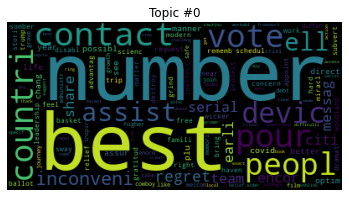

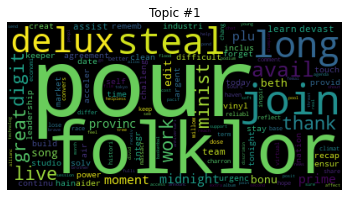

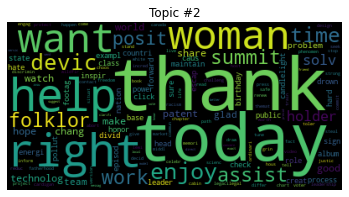

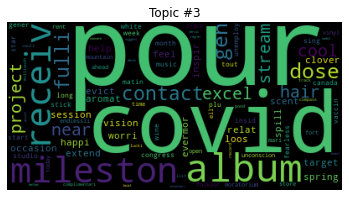

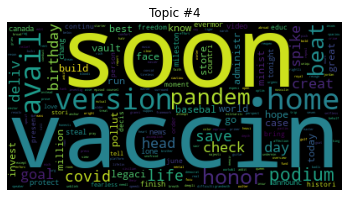

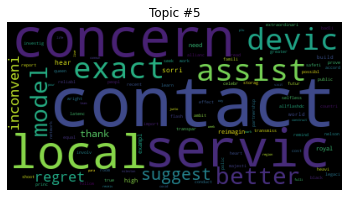

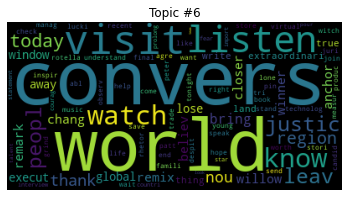

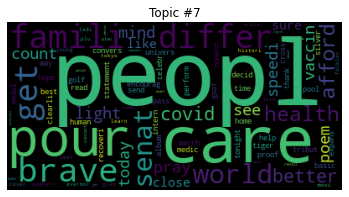

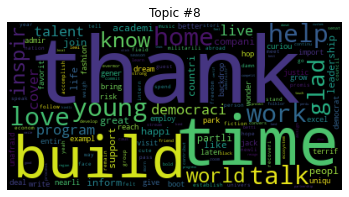

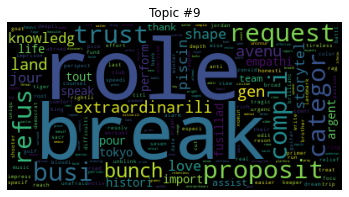

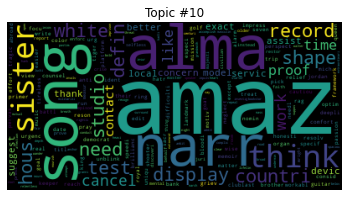

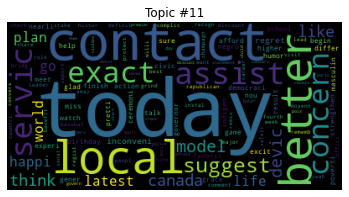

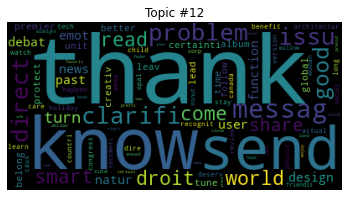

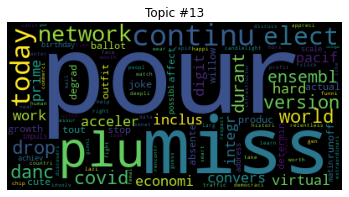

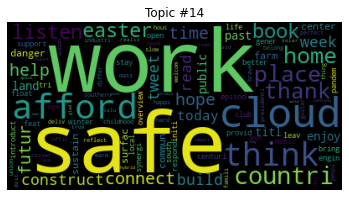

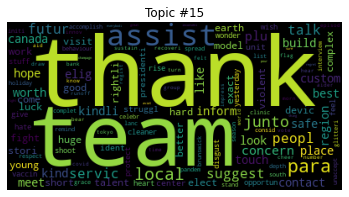

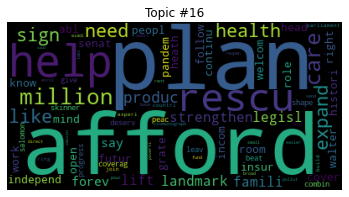

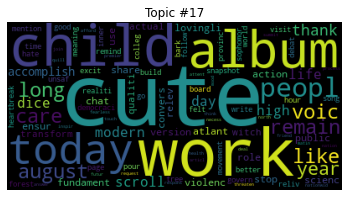

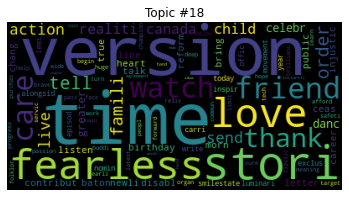

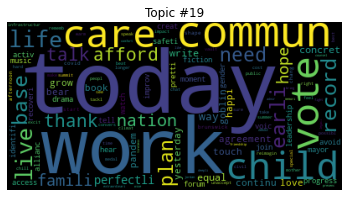

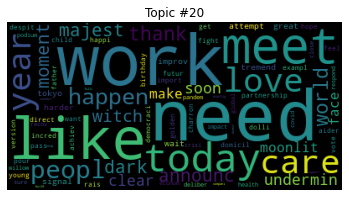

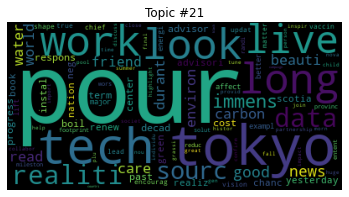

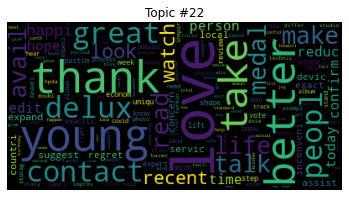

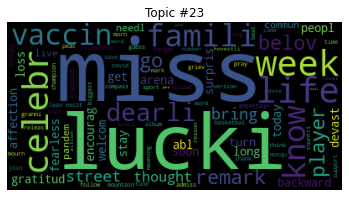

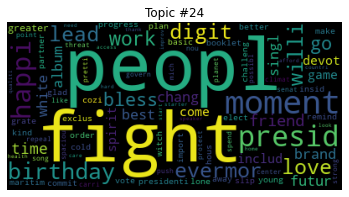

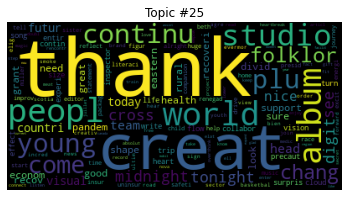

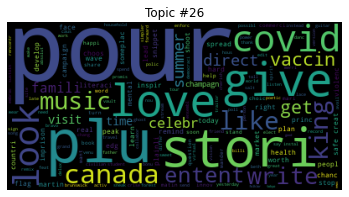

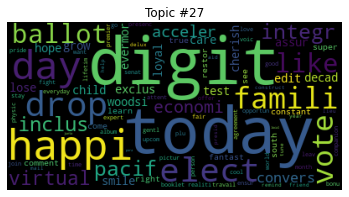

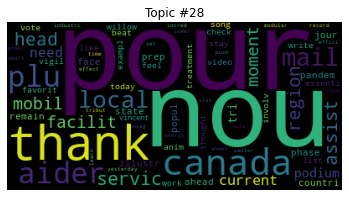

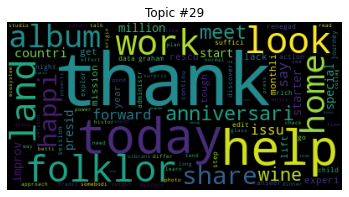

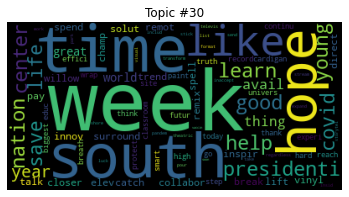

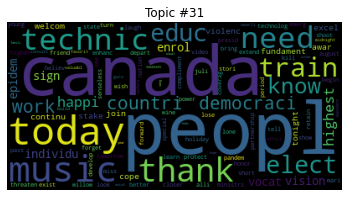

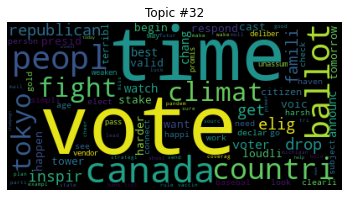

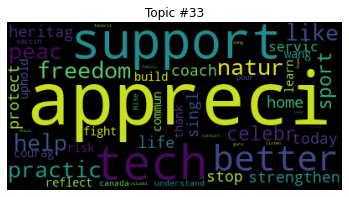

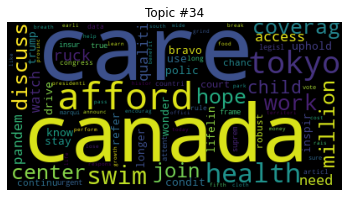

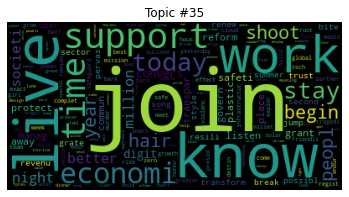

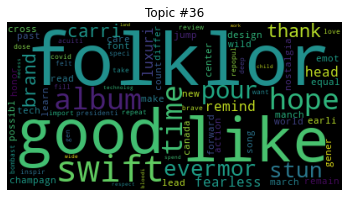

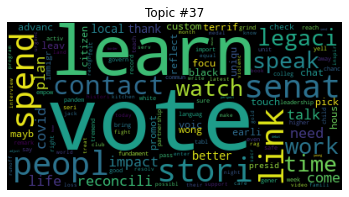

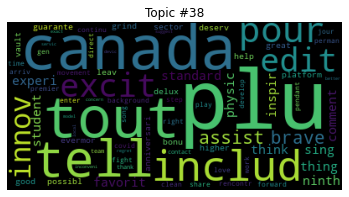

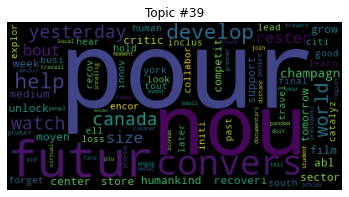

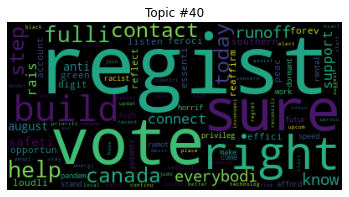

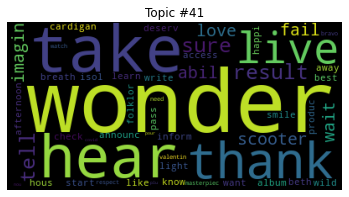

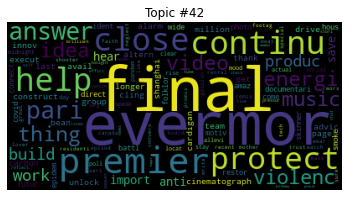

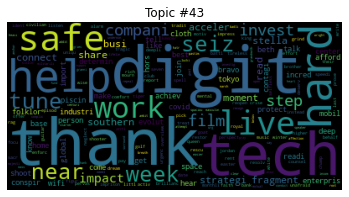

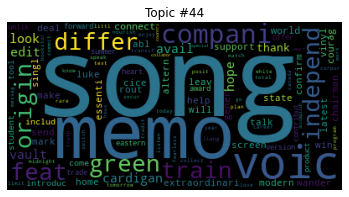

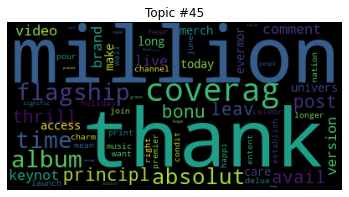

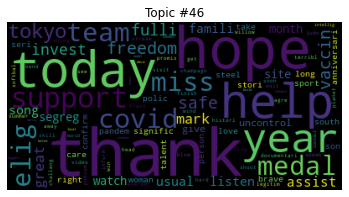

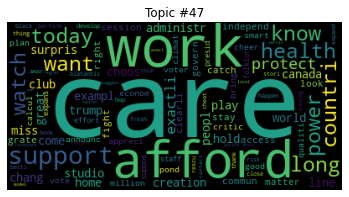

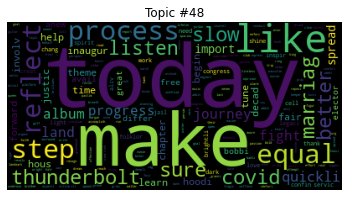

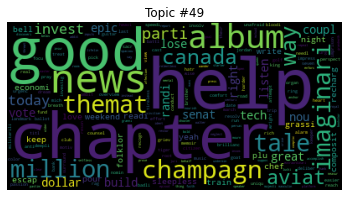

In [42]:
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [59]:
kl = []
for t in range(lda_model.num_topics):
    kl.extend(list(dict(lda_model.show_topic(t)).keys()))
    
pprint(kl)

['number',
 'best',
 'contact',
 'pour',
 'countri',
 'vote',
 'peopl',
 'devic',
 'assist',
 'ell',
 'pour',
 'folklor',
 'join',
 'long',
 'steal',
 'delux',
 'avail',
 'thank',
 'great',
 'minist',
 'thank',
 'today',
 'right',
 'help',
 'want',
 'woman',
 'enjoy',
 'devic',
 'time',
 'assist',
 'pour',
 'covid',
 'album',
 'mileston',
 'receiv',
 'dose',
 'gen',
 'contact',
 'fulli',
 'project',
 'soon',
 'vaccin',
 'home',
 'version',
 'avail',
 'pandem',
 'beat',
 'honor',
 'podium',
 'covid',
 'contact',
 'concern',
 'servic',
 'local',
 'assist',
 'exact',
 'devic',
 'better',
 'model',
 'suggest',
 'convers',
 'world',
 'visit',
 'listen',
 'watch',
 'know',
 'justic',
 'peopl',
 'leav',
 'today',
 'peopl',
 'care',
 'pour',
 'brave',
 'famili',
 'differ',
 'get',
 'world',
 'senat',
 'health',
 'thank',
 'time',
 'build',
 'young',
 'help',
 'home',
 'work',
 'talk',
 'love',
 'glad',
 'role',
 'break',
 'proposit',
 'trust',
 'request',
 'categor',
 'compli',
 'refus',
 'bus

In [62]:
kl_df = pd.DataFrame({'words':kl})

In [63]:
kl_df.to_csv('wordcloud_data') #specify location